Starting on code to ultimately plot a graph showing new construction vs remodel (by permit count)

In [31]:
# dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt

# csv path saved to variable-- will need to change the final directory
data = "../file/Construction_Permits_Issued_since_2010.csv"

# Read and display the CSV with Pandas
development_data_pd = pd.read_csv(data)
development_data_pd.head()

# filter to past 5 years
filtered_5y_DF = development_data_pd.loc[development_data_pd['CalendarYearIssued'] >= 2013, : ]
filtered_5y_DF.head()

C:\Users\zmsub\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (25,26,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PermitType,PermitTypeDesc,PermitNum,PermitClass,WorkClass,Condominium,ProjectName,Description,TCAD_ID,PropertyLegalDescription,...,OriginalCity,OriginalState,OriginalZip,CouncilDistrict,Jurisdiction,Link,ProjectID,Latitude,Longitude,Location
157671,EP,Electrical Permit,2013-122622 EP,C-1000 Commercial Remodel,Remodel,No,505 E 7TH ST,Change of use Exterior and Interior remodel to...,206040602,E 46FT OF LOT 7 BLOCK 065 ORIGINAL CITY,...,AUSTIN,TX,78701.0,9.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11054257,30.267353,-97.737534,"(30.26735287, -97.73753437)"
157672,EP,Electrical Permit,2013-119603 EP,Commercial,Repair,No,5319 N IH 35 SVRD NB,Replace feeder wire from weather head to tap b...,223130206,LOT 54 34AC OF DUVAL HEIGHTS NE TRI OF LOT 8...,...,AUSTIN,TX,78723.0,4.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11049361,30.311574,-97.708528,"(30.31157357, -97.7085284)"
157673,EP,Electrical Permit,2013-116412 EP,Commercial,Remodel,No,4807 BURNET RD,rebuild elect service to existing commercial b...,224030209,LOT 12 WOOD SAM R SUBD,...,AUSTIN,TX,78756.0,7.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11045752,30.319080,-97.738850,"(30.31908046, -97.73885014)"
157674,EP,Electrical Permit,2013-113251 EP,R- 435 Renovations/Remodel,Remodel,No,4930 TRAIL WEST DR,Bath remodel electrical plumbing upgrades,402231509,LOT 52 BLK 6 TRAILWOOD VILLAGE TWO AT TRAVIS C...,...,AUSTIN,TX,78735.0,8.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11040470,30.250061,-97.830968,"(30.2500614, -97.8309677)"
157675,EP,Electrical Permit,2013-105638 EP,R- 435 Renovations/Remodel,Remodel,No,5613 BENTSEN LN,Interior Remodel for Fire Damage Remove and r...,215240414,LOT 38 BLK B SENATE HILLS SUBD SEC 1,...,AUSTIN,TX,78723.0,1.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11029305,30.289303,-97.669189,"(30.2893035, -97.66918872)"


In [32]:
#determine how many total records for 2013 through 2018
len(filtered_5y_DF)

368979

In [34]:
# only look at records where the permit StatusCurrent states "Final" to look at construction jobs that were actually completed
finalized_permits_df = filtered_5y_DF[filtered_5y_DF['StatusCurrent'] == "Final"]
finalized_permits_df.head()

,PermitType,PermitTypeDesc,PermitNum,PermitClass,WorkClass,Condominium,ProjectName,Description,TCAD_ID,PropertyLegalDescription,...,OriginalCity,OriginalState,OriginalZip,CouncilDistrict,Jurisdiction,Link,ProjectID,Latitude,Longitude,Location
157671,EP,Electrical Permit,2013-122622 EP,C-1000 Commercial Remodel,Remodel,No,505 E 7TH ST,Change of use Exterior and Interior remodel to...,206040602,E 46FT OF LOT 7 BLOCK 065 ORIGINAL CITY,...,AUSTIN,TX,78701.0,9.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11054257,30.267353,-97.737534,"(30.26735287, -97.73753437)"
157673,EP,Electrical Permit,2013-116412 EP,Commercial,Remodel,No,4807 BURNET RD,rebuild elect service to existing commercial b...,224030209,LOT 12 WOOD SAM R SUBD,...,AUSTIN,TX,78756.0,7.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11045752,30.319080,-97.738850,"(30.31908046, -97.73885014)"
157674,EP,Electrical Permit,2013-113251 EP,R- 435 Renovations/Remodel,Remodel,No,4930 TRAIL WEST DR,Bath remodel electrical plumbing upgrades,402231509,LOT 52 BLK 6 TRAILWOOD VILLAGE TWO AT TRAVIS C...,...,AUSTIN,TX,78735.0,8.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11040470,30.250061,-97.830968,"(30.2500614, -97.8309677)"
157675,EP,Electrical Permit,2013-105638 EP,R- 435 Renovations/Remodel,Remodel,No,5613 BENTSEN LN,Interior Remodel for Fire Damage Remove and r...,215240414,LOT 38 BLK B SENATE HILLS SUBD SEC 1,...,AUSTIN,TX,78723.0,1.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11029305,30.289303,-97.669189,"(30.2893035, -97.66918872)"
157676,EP,Electrical Permit,2013-104112 EP,C-1000 Commercial Remodel,Remodel,No,9600 CIRCLE DR,Change of Use and Interior Remodel from SF Res...,404550102,LOT 10 ROCKWOOD SUBD,...,AUSTIN,TX,78736.0,8.0,AUSTIN LTD,https://abc.austintexas.gov/web/permit/public-...,11027514,30.243261,-97.922837,"(30.24326144, -97.92283706)"


In [35]:
#determine how many total finalized permits for 2013 through 2018
len(finalized_permits_df)

299299

In [36]:
# only look at records where the permit WorkClass states "New" to look at only new construction jobs that were actually completed
new_finalized_permits_df = finalized_permits_df[finalized_permits_df['WorkClass'] == "New"]
new_finalized_permits_df.head()

,PermitType,PermitTypeDesc,PermitNum,PermitClass,WorkClass,Condominium,ProjectName,Description,TCAD_ID,PropertyLegalDescription,...,OriginalCity,OriginalState,OriginalZip,CouncilDistrict,Jurisdiction,Link,ProjectID,Latitude,Longitude,Location
157682,EP,Electrical Permit,2013-067150 EP,R- 438 Residential Garage/Carport Addn,New,No,3214 BEVERLY RD,detached 2car garage w storage,120010710,LOT 17 N2FT OF LOT 16 BLK 1 BRYKERWOODS E,...,AUSTIN,TX,78703.0,10.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10972970,30.306010,-97.755006,"(30.30600951, -97.755006)"
157683,EP,Electrical Permit,2013-067149 EP,R- 101 Single Family Houses,New,No,3214 BEVERLY RD,two story single family home,120010710,LOT 17 N2FT OF LOT 16 BLK 1 BRYKERWOODS E,...,AUSTIN,TX,78703.0,10.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10972967,30.306010,-97.755006,"(30.30600951, -97.755006)"
157684,EP,Electrical Permit,2013-066156 EP,R- 438 Residential Garage/Carport Addn,New,No,6909 DAUGHERTY ST,New 1 story det 2 car garage w elect Permit ...,235040248,N 1661FT OF LOT 19 S 5339FT OF LOT 20 BLK 3 G...,...,AUSTIN,TX,78757.0,7.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,10971607,30.346911,-97.737737,"(30.34691072, -97.73773694)"
157724,BP,Building Permit,2013-052777 BP,R- 329 Res Structures Other Than Bldg,New,No,12882 PARK DR,Inground swimming pool and spa w req'd enclosu...,152440148,LOT 91A HUGHES PARK LAKE SUBD 1 AMENDED PLAT O...,...,AUSTIN,TX,78732.0,6.0,AUSTIN LTD,https://abc.austintexas.gov/web/permit/public-...,10953125,30.395636,-97.883050,"(30.39563586, -97.88305017)"
157731,EP,Electrical Permit,2013-125198 EP,C- 105 Five or More Family Bldgs,New,No,10500 LAKELINE MALL DR BLDG 34,New MultiFamily Residential Apartments,R517856,S10318 MANSIONS AT LAKELINE BLOCK A Lot 1 ACR...,...,AUSTIN,TX,78717.0,6.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11057432,30.477058,-97.789831,"(30.47705767, -97.78983123)"


In [37]:
#determine how many total New finalized permits for 2013 through 2018
len(new_finalized_permits_df)

102068

In [38]:
# only look at records where the permit WorkClass states "Remodel" or "Addition or Remodel" to look at only remodel construction jobs that were actually completed
remodel_finalized_permits_df = finalized_permits_df[(finalized_permits_df['WorkClass'] == "Remodel") | (finalized_permits_df['WorkClass'] == "Addition and Remodel")]
remodel_finalized_permits_df.head()

,PermitType,PermitTypeDesc,PermitNum,PermitClass,WorkClass,Condominium,ProjectName,Description,TCAD_ID,PropertyLegalDescription,...,OriginalCity,OriginalState,OriginalZip,CouncilDistrict,Jurisdiction,Link,ProjectID,Latitude,Longitude,Location
157671,EP,Electrical Permit,2013-122622 EP,C-1000 Commercial Remodel,Remodel,No,505 E 7TH ST,Change of use Exterior and Interior remodel to...,206040602,E 46FT OF LOT 7 BLOCK 065 ORIGINAL CITY,...,AUSTIN,TX,78701.0,9.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11054257,30.267353,-97.737534,"(30.26735287, -97.73753437)"
157673,EP,Electrical Permit,2013-116412 EP,Commercial,Remodel,No,4807 BURNET RD,rebuild elect service to existing commercial b...,224030209,LOT 12 WOOD SAM R SUBD,...,AUSTIN,TX,78756.0,7.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11045752,30.319080,-97.738850,"(30.31908046, -97.73885014)"
157674,EP,Electrical Permit,2013-113251 EP,R- 435 Renovations/Remodel,Remodel,No,4930 TRAIL WEST DR,Bath remodel electrical plumbing upgrades,402231509,LOT 52 BLK 6 TRAILWOOD VILLAGE TWO AT TRAVIS C...,...,AUSTIN,TX,78735.0,8.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11040470,30.250061,-97.830968,"(30.2500614, -97.8309677)"
157675,EP,Electrical Permit,2013-105638 EP,R- 435 Renovations/Remodel,Remodel,No,5613 BENTSEN LN,Interior Remodel for Fire Damage Remove and r...,215240414,LOT 38 BLK B SENATE HILLS SUBD SEC 1,...,AUSTIN,TX,78723.0,1.0,AUSTIN FULL PURPOSE,https://abc.austintexas.gov/web/permit/public-...,11029305,30.289303,-97.669189,"(30.2893035, -97.66918872)"
157676,EP,Electrical Permit,2013-104112 EP,C-1000 Commercial Remodel,Remodel,No,9600 CIRCLE DR,Change of Use and Interior Remodel from SF Res...,404550102,LOT 10 ROCKWOOD SUBD,...,AUSTIN,TX,78736.0,8.0,AUSTIN LTD,https://abc.austintexas.gov/web/permit/public-...,11027514,30.243261,-97.922837,"(30.24326144, -97.92283706)"


In [39]:
#determine how many total Remodel finalized permits for 2013 through 2018
len(remodel_finalized_permits_df)

91283

In [40]:
#group by CalendarYearIssued (from 2013 through 2018)
#then do a count on PermitType to see how many new permits were finalized and completed in each calendar year
new_permits_by_year_count = new_finalized_permits_df.groupby("CalendarYearIssued")["PermitType"].count()
new_permits_by_year_count

CalendarYearIssued
2013    17607
2014    18177
2015    18363
2016    22297
2017    21314
2018     4310
Name: PermitType, dtype: int64

In [41]:
# put all of the new permits by year count values into a list to use later in plot
new_permits_completed_by_year = new_permits_by_year_count.tolist()

In [42]:
#group by CalendarYearIssued (from 2013 through 2018)
#then do a count on PermitType to see how many Remodel permits were finalized and completed in each calendar year
remodel_permits_by_year_count = remodel_finalized_permits_df.groupby("CalendarYearIssued")["PermitType"].count()
remodel_permits_by_year_count

CalendarYearIssued
2013    23518
2014    21905
2015    18306
2016    12917
2017    11055
2018     3582
Name: PermitType, dtype: int64

In [43]:
# put all of the remodel permits by year count values into a list to use later in plot
remodel_permits_completed_by_year = remodel_permits_by_year_count.tolist()

In [44]:
#create a list that holds the value of the years being looked to use later in plot
years_list = filtered_5y_DF["CalendarYearIssued"].unique()
years_list

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

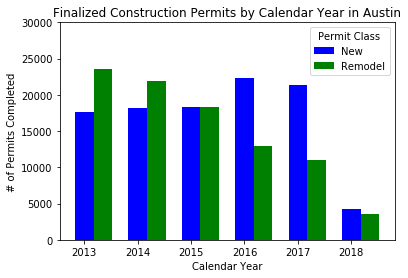

In [70]:
# Build the scatter plots for new permits by calendar year issued and remodel permits by calendar year issued

# x-axis for the two different scatter plots should be years_list
# y-axis for the two different scatter plots should be new_permits_completed_by_year and remodel_permits_completed_by_year
# s (size) for the three different scatter plots should be scale_new_rural_driver_count, scale_new_suburban_driver_count, and scale_new_urban_driver_count

#label for x-axis
plt.xlabel("Calendar Year")
#label for y-axis
plt.ylabel("# of Permits Completed")

width = 0.35       # the width of the bars

#create handles for legend and add marker, color, label, edgecolors, alpha and linewidths
#new_permits_scatter =plt.scatter(years_list, new_permits_completed_by_year, marker="o",color="red", label="New", edgecolors="black", alpha=0.8, linewidths=1)
#remodel_permits_scatter =plt.scatter(years_list, remodel_permits_completed_by_year, marker="o",color="blue", label="Remodel", edgecolors="black", alpha=0.8, linewidths=1)

new_permits_bar  = plt.bar(years_list, new_permits_completed_by_year, width, color="b", align="center", label="New")
remodel_permits_bar  = plt.bar(years_list+width, remodel_permits_completed_by_year, width, color = "g", align="center", label="Remodel")

# add title to legend and location
lgnd = plt.legend(handles = [new_permits_bar, remodel_permits_bar], loc="upper right", title="Permit Class")
#change the circle size in legend for all three city types to be same size
#lgnd.legendHandles[0]._sizes = [30.0]
#lgnd.legendHandles[1]._sizes = [30.0]

# make title
plt.title("Finalized Construction Permits by Calendar Year in Austin")

# The y limits of our plot is to 0 to 30000
plt.ylim(0, 30000)

# Set a grid on the plot
#plt.grid()

# Incorporate a text label regarding circle size
#textstr = 'Note:\nCircle size correlates with driver count per city'
# x-axis location is about 43 and y-axis location is about 35 to put the text label
#plt.text(43,35, textstr)

# Save Figure
plt.savefig("../Images/Permits_New_vs_Remodel_Calendar_Year_Bar_Plot.png")

plt.show()